# 1. 주제 선정 이유

최근 가좌주공아파트 방화 살인 사건, 창원 할머니 살인 사건의 가해자가 조현병 환자로 밝혀지자 조현병 환자 관리와는 별개로 잔혹한 범죄를 저지른 이들이 심신미약으로  원죄에 비해 약한처벌을 받으리라는 추측에 국민들이 분노하고 있다.<p>또한 최근 성범죄자 조두순의 출소가 얼마남지 않았다는 사실이 보도되자 조두순이 받는 처벌이 죄에 비해 지나치게 가벼웠으며 그러기에 출소를 막아야 한다는 국민 청원도 올라와 있다.<p> 
    나 또한 살인사건/성범죄 사건의 판결을 뉴스를 통해 접하며 과연 범죄자들에게 저 정도의 처벌이 충분한 것인지에 대한 고민을 해본적이 많다. 또한 악질범죄자가 심신미약의 이유로 감형이 선고될때는 분노와 더불어 정말 어이없다고 생각한 적이 많았다.<p>무거울 수 있는 주제이지만 이번 TermProject를 통해 살인사건/성범죄사건의 판결문을 분석하여 범죄에 대한 처벌 수위의 적합성 / 처벌 수위의 공정성 / 심신미약의 정상참작 이후 처벌의 감형 정도에 대하여 분석을 해보고 강력범죄에 대한 처벌이 제대로 이루어지고 있는가에 대해 분석하기 위해 이런 주제를 선정했다.<br>

# 2. 가설 정의

1) 살인 / 성범죄 모두에 있어 가해자의 심신미약 상태가 참작이 될 경우 그렇지 않은 경우에 비해 큰 감형이 이루어 질 것이다.

2) 유사한 범죄에 대해 다른 수위의 형벌을 선고하는 공정하지 못한 판결이 존재할 것이다.

3) 특정 범죄군의 형량을 수치화하면 충분한 형량을 내린 판결과 그렇지 못한 판결을 구분할 수 있을 것이다.




# 3. 인터넷을 통한 데이터 획득

1) 전국법원 주요 판결 - http://www.scourt.go.kr/portal/dcboard/DcNewsListAction.work?gubun=44

- 해당 사이트에서 주요판결 -> 살인 검색시 246건의 살인사건에 대한 사건요약과 판결내용을 얻을 수 있음.<br>
-> 그 중 사건요약이 제대로 나와있는 게시물을 모두 추려 사건요약 및 판결내용을 text 형태로 저장함.<p>
- 또한 아동청소년성범죄, 심신미약상태에서의 범죄 검색하여 이에 대한 사건요약과 판결 내용을 얻을 수 있음.<br>
-> 그 중 사건요약이 제대로 나와있는 게시물을 모두 추려 사건요약 및 판결내용을 text 형태로 저장함.<p>
- 파이썬을 이용하여 범죄 text 파일들을 모두 합쳐 하나의 list로 만든다.<p>

- list 들의 비교(set으로 전환등)을 통해 중복되는 요소들을 찾으며 각 범죄요소와 형벌을 연결시켜 수치화 함.

<br>* beautifulsoup4 모듈을 사용하여 데이터를 얻으려 했지만 실패하여 직접 데이터 파일을 복사하는 방식으로 데이터를 얻어냈습니다.
<br>* 요약문 외의 본 평결문도 분석하고자 했으나 데이터 가공이 어려워 final report에서는 배제하기로 결정했습니다.



# 4. 분석을 위한 데이터의 가공

## 4-1 데이터 분석을 위한 모듈 import하기.

In [1]:
# text file을 합쳐 list를 만들기 위해 requests 모듈과 os 모듈을 import 했습니다.
import requests
import os

## 4-2 그래프를 그리기 위한 원본 데이터 가공

#### 4-2-1 원본 판례 파일들을 불러와 하나의 list로 만들기

In [2]:
# Pre = precedent, Mur = murder, Kids = 아동청소년 성범죄, Fee = 심신미약상태(feeble mind), Num = 숫자(개수)를 의미하며 이후에도 동일하게 사용됩니다.

#1. 살인 사건에 대한 text file을 합쳐 list로 작성 (아래 #2~#3은 동일 과정 반복)

#지정된 폴더안에 있는 파일을 불러와 하나의 list로 만들었습니다. 
Pre_mur = []
for i in os.listdir('C:\\Users\\ATIV\\Desktop\\Python-TermProject\\Precedent_murder'):
    if i.endswith('.txt'):
        crime = open(i,'r')
        text = crime.read()
        Pre_mur.append(text)
        crime.close()
        
murder_num = range(len(Pre_mur)) #살인 사건 list에 포함된 살인사건(판례)의 개수를 의미합니다.


New_pre_mur = [] #새로운 list를 만든 후 눈에 가장 많이 거슬리는 \t와 \n만 추가로 제거해줬습니다.
for i in murder_num:
    New_pre_mur.append(Pre_mur[i].replace("\t",""))
for i in murder_num:
    New_pre_mur[i].replace('\n','')
    



#2. 아동 성범죄 사건 text file을 합쳐 list로 작성 / #1과 동일한 과정입니다.


                       
Pre_kids = []
for i in os.listdir('C:\\Users\\ATIV\\Desktop\\Python-TermProject\\Precedent_kids'):
    if i.endswith('.txt'):
        crime = open(i,'r')
        text = crime.read()
        Pre_kids.append(text)
        crime.close()

kids_num = range(len(Pre_kids))

New_pre_kids = []
for i in kids_num:
    New_pre_kids.append(Pre_kids[i].replace("\t",""))
for i in kids_num:
    New_pre_kids[i].replace('\n','')



#3. 심신미약 상태에서의 범죄 사건 text file을 합쳐 list로 작성 / #1과 동일한 과정입니다.

Pre_fee = []
for i in os.listdir('C:\\Users\\ATIV\\Desktop\\Python-TermProject\\Precedent_feeble'):
    if i.endswith('.txt'):
        crime = open(i,'r')
        text = crime.read()
        Pre_fee.append(text)
        crime.close()

fee_num = range(len(Pre_fee))

New_pre_fee = []
for i in fee_num:
    New_pre_fee.append(Pre_fee[i].replace("\t",""))
for i in fee_num:
    New_pre_mur[i].replace('\n','')



### 4-2-1과정의 list 파일을 입력받아 데이터를 가공하는 함수 정의하기

In [3]:
def process_pre(Pre_Num, DataSet,ProcessedData):
    """
    <판례의 개수, list 형태의 판례 데이터, 가공하여 만들고자 하는 list의 이름>을 입력받습니다.
    
    데이터의 가공 과정은
    
    1. 실제 살인의 유무
    2. 살인 미수의 유무
    3. 아동청소년 성범죄의 유무
    4. 심신미약 상태의 유무
    
    1~4 과정을 판례에 해당 단어가 포함되어 있는지로 판단합니다.
    해당 범죄에 해당되면 O 라벨을, 아니면 X 라벨을 붙여 새로운 리스트에 아이템으로 추가합니다
    
    5. 피의자가 받은 형벌을 무죄 / 집행유예 / 무기징역 /징역으로 구분하여 [형벌종류, 형량]을 해당하는 list의 아이템에 추가합니다.
    
    EX) 판례 리스트:              ['살인 미수이며 심신미약 상태인 점을 감안하여 집행유예를 선고한다.']
        가공하여 만들어진 리스트: ['O', 'O', 'X', 'O', 'probation', 'Execution-suspended' ]
    
    
    
    """
    for i in Pre_Num:
        if '살인' in DataSet[i]:
            ProcessedData.append(['O'])
        elif '살해' in DataSet[i]: # 살인을 살해로 표현하는 경우가 있어 한번더 판단하도록 했습니다.
            ProcessedData.append(['O'])
        else:
            ProcessedData.append(['X'])
    for i in Pre_Num:
        if '미수' in DataSet[i]:
            ProcessedData[i].extend('O')
        else:
            ProcessedData[i].extend('X')
    for i in Pre_Num:
        if '성' in DataSet[i]:
            ProcessedData[i].extend('O')
        else:
            ProcessedData[i].extend('X')
    for i in Pre_Num:
        if '심신미약' in DataSet[i]:
            ProcessedData[i].extend('O')
        else:
            ProcessedData[i].extend('X')
    for i in Pre_Num:
        if '무죄' in DataSet[i]:
            ProcessedData[i].extend(['innocence'])
            ProcessedData[i].extend('0')
        elif '집행유예' in DataSet[i]:
            ProcessedData[i].extend(['probation'])
            ProcessedData[i].extend(['Execution Suspended'])
        elif '무기징역' in DataSet[i]:
            ProcessedData[i].extend(['life'])
            ProcessedData[i].extend(['Life-time Sentenced'])
        else:
            ProcessedData[i].extend(['imprisonment'])
            prison_term = int(DataSet[i].find('징역'))
            ProcessedData[i].extend([DataSet[i][prison_term:prison_term+6]])
    return ProcessedData


4-2-1의 함수를 이용하여 판례를 가공하여 만든 list의 결과는 아래와 같습니다.

In [4]:
#가공된 데이터를 item으로 가질 list를 만들어줍니다.
processed_Fee = []
processed_Mur = []
processed_Kids = []

print(process_pre(murder_num, New_pre_mur, processed_Mur))
print(process_pre(fee_num, New_pre_fee, processed_Fee))
print(process_pre(kids_num, New_pre_kids, processed_Kids))


[['O', 'X', 'O', 'O', 'imprisonment', '징역 10년'], ['O', 'X', 'X', 'X', 'imprisonment', '징역 17년'], ['O', 'X', 'X', 'X', 'imprisonment', '징역 17년'], ['O', 'X', 'O', 'X', 'imprisonment', '징역 10년'], ['O', 'X', 'X', 'X', 'innocence', '0'], ['O', 'X', 'X', 'X', 'imprisonment', '징역 23년'], ['X', 'X', 'X', 'X', 'innocence', '0'], ['O', 'X', 'X', 'X', 'innocence', '0'], ['O', 'O', 'X', 'X', 'imprisonment', '징역 2년의'], ['X', 'X', 'X', 'X', 'probation', 'Execution Suspended'], ['O', 'X', 'X', 'O', 'imprisonment', '징역 25년'], ['O', 'O', 'X', 'X', 'imprisonment', '징역 5년을'], ['O', 'O', 'X', 'X', 'imprisonment', '징역 4년의'], ['O', 'O', 'O', 'X', 'imprisonment', '징역 3년의'], ['O', 'O', 'O', 'X', 'imprisonment', '징역 3년의'], ['O', 'X', 'X', 'X', 'probation', 'Execution Suspended'], ['O', 'O', 'X', 'X', 'imprisonment', '징역 3년의'], ['O', 'X', 'X', 'X', 'imprisonment', '징역 25년'], ['O', 'X', 'O', 'X', 'imprisonment', '징역 12년'], ['O', 'O', 'X', 'X', 'imprisonment', '징역 12년'], ['O', 'X', 'X', 'X', 'imprisonment', '징역 12

### 4-3-1 가공된 데이터(하나의 리스트)를 받아 그래프를 그리는 함수 정의하기

In [5]:
def data_to_graph(Pre_num,ProcessedData):
    """
    <판례의 개수, 가공된 데이터>를 입력받습니다. 출력값은 판례번호-판례속 형량 그래프입니다.
    
    가공된 데이터가 list in list 형태인 점을 감안할 때, 각 아이템의 5(0부터 시작)번째 아이템이 형량을 의미함을 알 수 있습니다.
    
    무죄인 경우 0년,
    집행유예인 경우 0.01년, (피의자의 행실에 따라 징역형으로 이어질 수 있지만 대다수가 무죄로 생각하는 점을 감안했습니다. 
                            하지만 무죄와의 차이를 두기위해 0.01년으로 설정했습니다.)
    징역형인 경우 그 형벌 그대로,
    무기징역인 경우 40년으로 정했습니다. (유기징역의 경우 최고 형량이 30년인점을 감안했습니다. 유기징역과 원활한 비교를 위해 40년을 임의로 설정했습니다.)
    
    X축에는 판례의 번호(가공된 데이터의 list index) y축은 해당 판례의 형벌을 의미합니다.
    
    """
    %matplotlib inline
    from matplotlib import pyplot as plt
    GraphName = input(prompt = "What is your case about? ex)murder, kids, feeble: ") #graph의 이름을 결정하기 위해 범죄(판례) 유형을 입력받습니다.
    X_axis = []
    for i in Pre_num:
        X_axis.append('%d' % i)
    import re
    import functools
    Y_axis = []
    for i in Pre_num:
        Y_axis.append(re.findall('\d+',(ProcessedData[i][5])))
        if Y_axis[i] == []:
            Y_axis[i] = ['-1'] # 무기징역, 집행유예의 경우 list에 아이템이 추가되지 않기에 임의로 '-1'을 추가한후 바로 아래의 과정을 거쳤습니다.
    # 형벌이 '-1'인 경우 무기징역, 집행유예인 사건이기에 fdr에 쓰여진대로 40년, 0.01년으로 수정했습니다.
    for k in Pre_num:
        if ProcessedData[i][5] == 'Life-time Sentenced':
            Y_axis[i] = ['40']
        elif ProcessedData[i][5] == 'Execution Suspended':
            Y_axis[i] = ['0.01']
    Y_axis = functools.reduce(lambda x, y: x + y, Y_axis) 
    sorted_Y_axis = []
    for i in Pre_num:
        sorted_Y_axis.append(float(Y_axis[i]))
    plt.figure(figsize=(50,4))
    plt.plot(X_axis, sorted_Y_axis, color='red', marker="1", linestyle='solid')
    plt.title('Graph for {}'.format(GraphName))
    plt.xlabel('판례 번호')
    plt.ylabel('형량')
    return plt.show()

What is your case about? ex)murder, kids, feeble: Murder


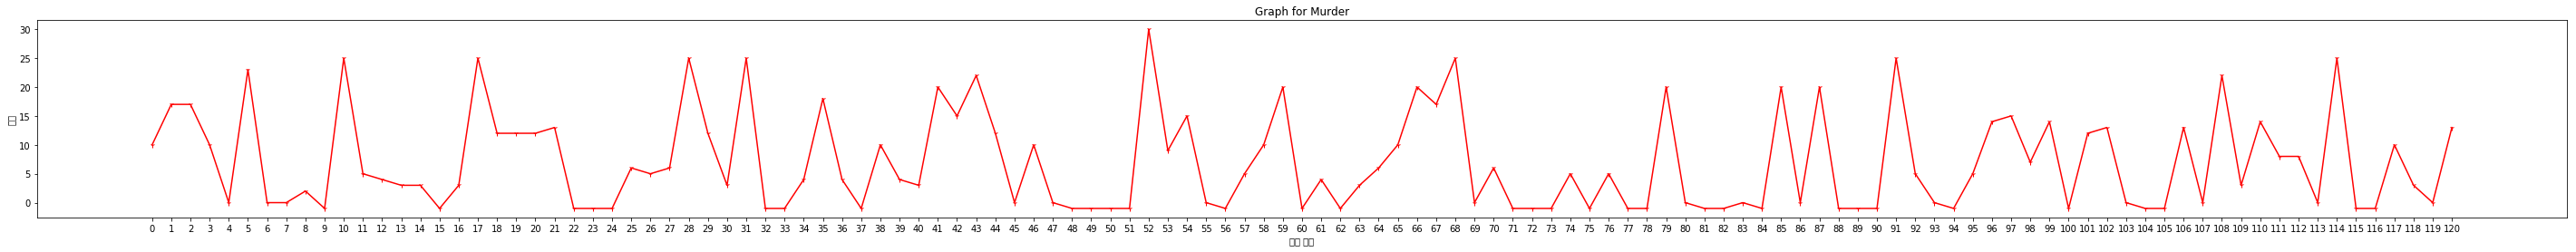

What is your case about? ex)murder, kids, feeble: Kids


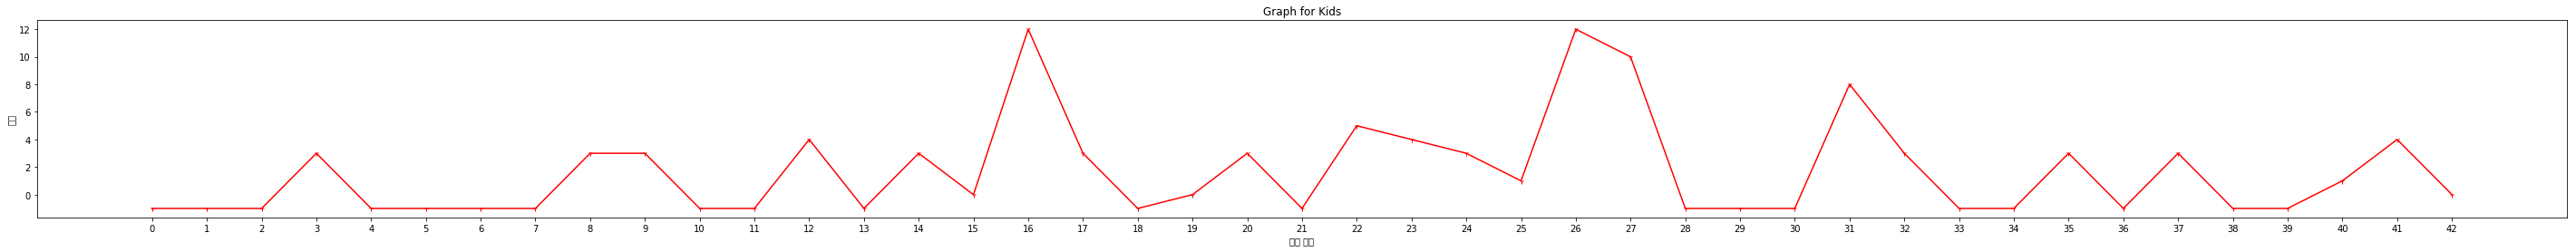

What is your case about? ex)murder, kids, feeble: Feeble


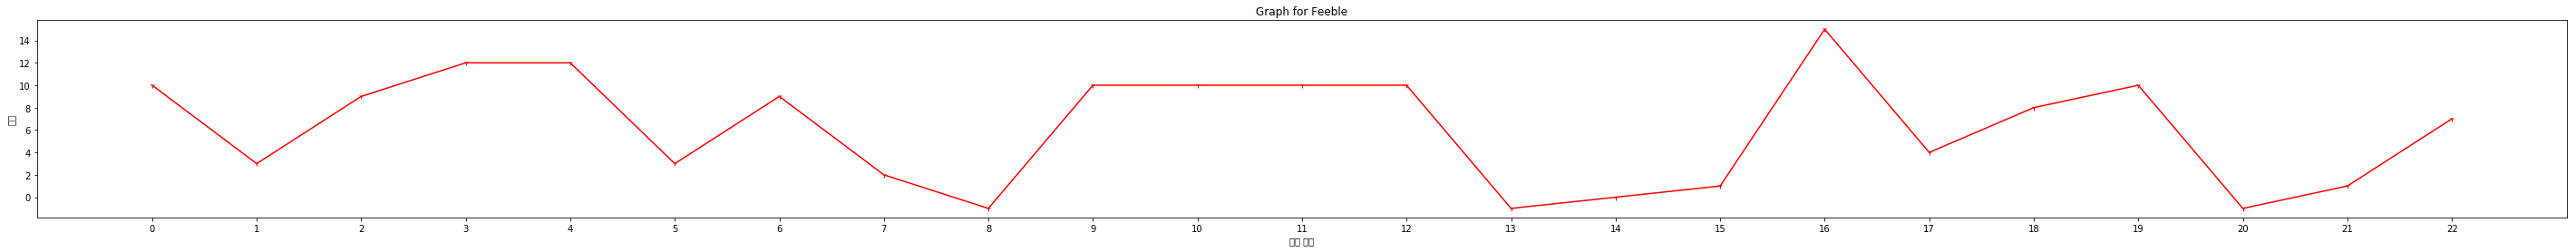

In [6]:
data_to_graph(murder_num, processed_Mur)
data_to_graph(kids_num, processed_Kids)
data_to_graph(fee_num, processed_Fee)

### 4-3-2 여러 리스트를 받아 입력된 index에 따른 그래프를 그리는 함수 정의

In [7]:
def sum_data_to_graph(ProcessedData1,ProcessedData2, ProcessedData3):
    """
    4-2-1의 process_pre() 함수를 통해 판례를 ['살인유무','살인미수유무','아동청소년성범죄유뮤','심신미약유무','형벌종류','형량'] 형태로 만들었습니다.
    
    이 함수는 일단 위 형식으로 가공된 list를 입력받아 모든 사건을 포괄하는 list를 만듭니다.
    그다음 범죄 유형에 따른 index를 사용자로부터 input받습니다.
    
    ex> 사용자의 input이 OXOO 인 경우 -> 살인 사건, 아동청소년 성범죄 사건이면서 심신미약 상태에서 일어난 경우를 의미합니다.
    이제 이렇게 입력받은 값을 이용하여 모든 사건을 포괄하는 list에서 사용자의 입력값과 일치하는 item을 찾아냅니다.
    
    사용자가 입력한 index를 print한 후 찾아낸 item을 모아서 판례-형량 graph를 출력합니다. 
    
    """
    %matplotlib inline
    from matplotlib import pyplot as plt 
    import re
    import functools
    index_Mur = str(input(prompt="If your case is 'murder' input:O. If not, input:X"))
    index_Miss = str(input(prompt="If your case is 'missed_murder' input:O. If not, input:X")) 
    index_Kids = str(input(prompt="If your case is 'Kids_crime' input:O. If not, input:X"))
    index_Fee = str(input(prompt="If your case is 'Feeble-mind' input:O. If not, input:X"))
    Sum_Data = ProcessedData1 + ProcessedData2 + ProcessedData3
    
    Pre_num = range(len(Sum_Data)) #Pre_num은 모든 판례의 개수를 의미합니다.
    
    index_Data = [] #t사용자가 입력한 index에 해당하는 item을 새롭게 모은 list입니다.
    for i in Pre_num:
        if index_Mur == Sum_Data[i][0] and index_Miss == Sum_Data[i][1] and index_Kids == Sum_Data[i][2] and index_Fee == Sum_Data[i][3]:
            index_Data.append(Sum_Data[i])
            
    New_num = len(index_Data)
    X_axis = []
    for i in range(New_num):
        X_axis.append('%d' % i)
    Y_axis = []
    for i in range(New_num):
        Y_axis.append(re.findall('\d+',(index_Data[i][5])))
        if Y_axis[i] == []:
            Y_axis[i] = ['-1']
    Y_axis = functools.reduce(lambda x, y: x + y, Y_axis)
    sorted_Y_axis = []
    for i in range(New_num):
        sorted_Y_axis.append(Y_axis[i])        
    for i in range(New_num):
        if index_Data[i][5] == 'Life-time Sentenced':
            sorted_Y_axis[i] = str(40)
        elif index_Data[i][5] == 'Execution Suspended':
            sorted_Y_axis[i] = str(0)
    for i in range(New_num):
        sorted_Y_axis[i] = float(sorted_Y_axis[i])
        
    plt.figure(figsize=(50,4))
    plt.plot(X_axis, sorted_Y_axis, color='red', marker="1", linestyle='solid')
    plt.title("Crime-Sentence")
    plt.xlabel('판례 번호')
    plt.ylabel('형량')
    print('Your case is (Murder, Missed_Murder, Kids_crime, Feeble_mind)',(index_Mur, index_Miss, index_Kids, index_Fee)) # 사용자가 입력한 index를 print합니다.
    return plt.show()

If your case is 'murder' input:O. If not, input:XO
If your case is 'missed_murder' input:O. If not, input:XX
If your case is 'Kids_crime' input:O. If not, input:XX
If your case is 'Feeble-mind' input:O. If not, input:XX
Your case is (Murder, Missed_Murder, Kids_crime, Feeble_mind) ('O', 'X', 'X', 'X')


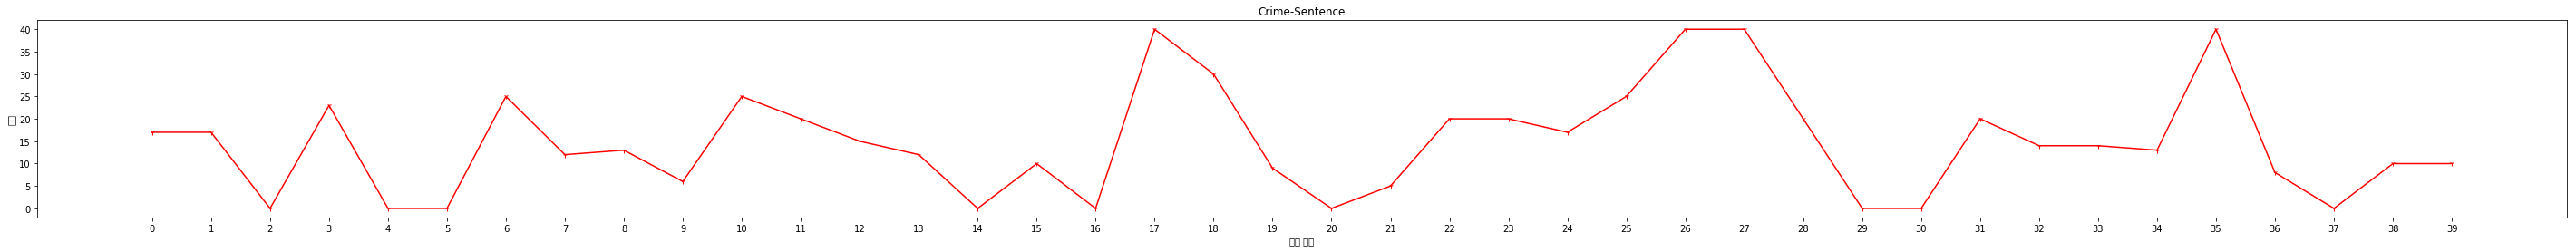

In [8]:
sum_data_to_graph(processed_Mur,processed_Kids,processed_Fee)

If your case is 'murder' input:O. If not, input:XO
If your case is 'missed_murder' input:O. If not, input:XX
If your case is 'Kids_crime' input:O. If not, input:XX
If your case is 'Feeble-mind' input:O. If not, input:XO
Your case is (Murder, Missed_Murder, Kids_crime, Feeble_mind) ('O', 'X', 'X', 'O')


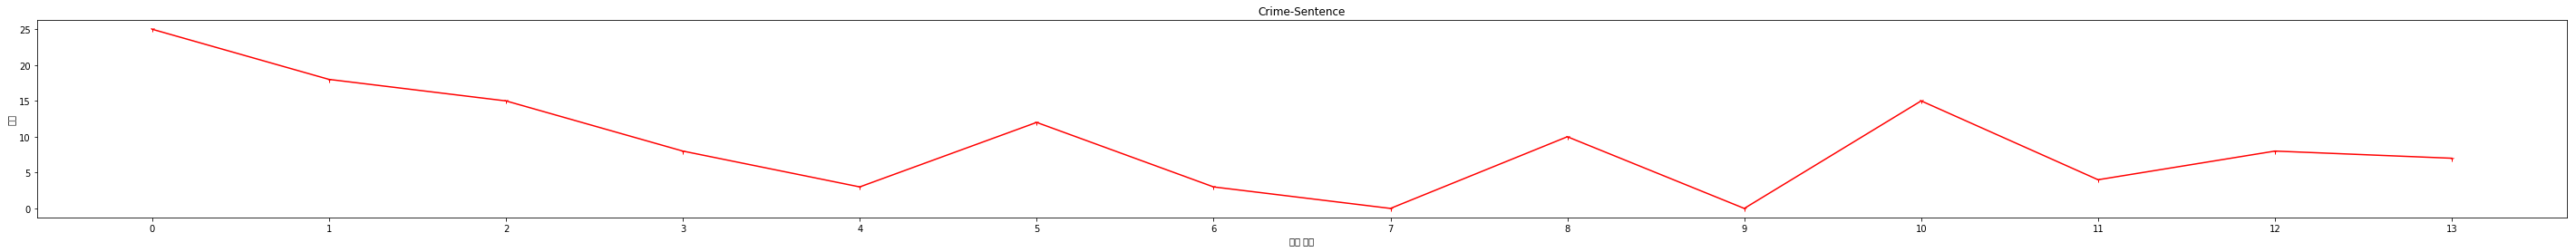

In [9]:
sum_data_to_graph(processed_Mur,processed_Kids,processed_Fee)

사용자가 입력할 수 있는 index의 가짓수인 2^4개의 그래프를 그릴 수있지만 2개만 그려봤습니다.

### 4-3-3 여러 리스트를 받아 입력된 index에 따른 table을 그리는 함수 정의

In [10]:
def sum_data_to_table(ProcessedData1,ProcessedData2, ProcessedData3):
    """
    
    그래프는 판례번호-형량만 보여줬기에 index와 형벌 종류, 형량을 table로 보여주는 함수를 정의해 봤습니다.
    입력값은 4-3-2와 같이 가공된 판례로 이루어진 list들 입니다.
    
    사용자의 index 입력 방식 및 사용자가 input한 index에 맞는 판례를 찾는 방식은 data_to_graph()함수와 동일합니다. ->help(data_to_graph())이용
    
    출력값은 사용자가 입력한 index, 형벌 종류, 형량입니다.
    
    """
    from pandas import DataFrame
    index_Mur = str(input(prompt="If your case is 'murder' input:O. If not, input:X"))
    index_Miss = str(input(prompt="If your case is 'missed_murder' input:O. If not, input:X")) 
    index_Kids = str(input(prompt="If your case is 'Kids_crime' input:O. If not, input:X"))
    index_Fee = str(input(prompt="If your case is 'Feeble-mind' input:O. If not, input:X"))
    Sum_Data = ProcessedData1 + ProcessedData2 + ProcessedData3
    
    Pre_num = range(len(Sum_Data))
    index_Data = []
    
    for i in Pre_num:
        if index_Mur == Sum_Data[i][0] and index_Miss == Sum_Data[i][1] and index_Kids == Sum_Data[i][2] and index_Fee == Sum_Data[i][3]:
            index_Data.append(Sum_Data[i])
    New_table = DataFrame.from_records(index_Data,columns=['Murder','Miss','Kids','FeebleMinded','Sentence','punishment'])
    return New_table

In [11]:
sum_data_to_table(processed_Mur,processed_Kids,processed_Fee)

If your case is 'murder' input:O. If not, input:XO
If your case is 'missed_murder' input:O. If not, input:XO
If your case is 'Kids_crime' input:O. If not, input:XO
If your case is 'Feeble-mind' input:O. If not, input:XO


,Murder,Miss,Kids,FeebleMinded,Sentence,punishment
0,O,O,O,O,life,Life-time Sentenced
1,O,O,O,O,imprisonment,징역 3년의


In [12]:
sum_data_to_table(processed_Mur,processed_Kids,processed_Fee)

If your case is 'murder' input:O. If not, input:XO
If your case is 'missed_murder' input:O. If not, input:XO
If your case is 'Kids_crime' input:O. If not, input:XO
If your case is 'Feeble-mind' input:O. If not, input:XX


,Murder,Miss,Kids,FeebleMinded,Sentence,punishment
0,O,O,O,X,imprisonment,징역 3년의
1,O,O,O,X,imprisonment,징역 3년의
2,O,O,O,X,probation,Execution Suspended
3,O,O,O,X,probation,Execution Suspended
4,O,O,O,X,probation,Execution Suspended
5,O,O,O,X,imprisonment,징역 4년을
6,O,O,O,X,imprisonment,징역 10년
7,O,O,O,X,innocence,0
8,O,O,O,X,life,Life-time Sentenced
9,O,O,O,X,imprisonment,징역 13년


In [13]:
sum_data_to_table(processed_Mur,processed_Kids,processed_Fee)

If your case is 'murder' input:O. If not, input:XO
If your case is 'missed_murder' input:O. If not, input:XO
If your case is 'Kids_crime' input:O. If not, input:XX
If your case is 'Feeble-mind' input:O. If not, input:XO


,Murder,Miss,Kids,FeebleMinded,Sentence,punishment
0,O,O,X,O,imprisonment,징역 6년의
1,O,O,X,O,imprisonment,징역 9년에


In [14]:
sum_data_to_table(processed_Mur,processed_Kids,processed_Fee)

If your case is 'murder' input:O. If not, input:XO
If your case is 'missed_murder' input:O. If not, input:XO
If your case is 'Kids_crime' input:O. If not, input:XX
If your case is 'Feeble-mind' input:O. If not, input:XX


,Murder,Miss,Kids,FeebleMinded,Sentence,punishment
0,O,O,X,X,imprisonment,징역 2년의
1,O,O,X,X,imprisonment,징역 5년을
2,O,O,X,X,imprisonment,징역 4년의
3,O,O,X,X,imprisonment,징역 3년의
4,O,O,X,X,imprisonment,징역 12년
5,O,O,X,X,probation,Execution Suspended
6,O,O,X,X,imprisonment,징역 5년을
7,O,O,X,X,imprisonment,징역 3년의
8,O,O,X,X,probation,Execution Suspended
9,O,O,X,X,imprisonment,징역 4년의


In [15]:
sum_data_to_table(processed_Mur,processed_Kids,processed_Fee)

If your case is 'murder' input:O. If not, input:XO
If your case is 'missed_murder' input:O. If not, input:XX
If your case is 'Kids_crime' input:O. If not, input:XO
If your case is 'Feeble-mind' input:O. If not, input:XO


,Murder,Miss,Kids,FeebleMinded,Sentence,punishment
0,O,X,O,O,imprisonment,징역 10년
1,O,X,O,O,imprisonment,징역 12년
2,O,X,O,O,imprisonment,징역 10년
3,O,X,O,O,imprisonment,징역 10년


In [16]:
sum_data_to_table(processed_Mur,processed_Kids,processed_Fee)

If your case is 'murder' input:O. If not, input:XO
If your case is 'missed_murder' input:O. If not, input:XX
If your case is 'Kids_crime' input:O. If not, input:XO
If your case is 'Feeble-mind' input:O. If not, input:XX


,Murder,Miss,Kids,FeebleMinded,Sentence,punishment
0,O,X,O,X,imprisonment,징역 10년
1,O,X,O,X,imprisonment,징역 12년
2,O,X,O,X,imprisonment,징역 25년
3,O,X,O,X,imprisonment,징역 12년
4,O,X,O,X,probation,Execution Suspended
5,O,X,O,X,imprisonment,징역 15년
6,O,X,O,X,imprisonment,징역 10년
7,O,X,O,X,life,Life-time Sentenced
8,O,X,O,X,imprisonment,징역 6년을
9,O,X,O,X,life,Life-time Sentenced


In [17]:
sum_data_to_table(processed_Mur,processed_Kids,processed_Fee)

If your case is 'murder' input:O. If not, input:XO
If your case is 'missed_murder' input:O. If not, input:XX
If your case is 'Kids_crime' input:O. If not, input:XX
If your case is 'Feeble-mind' input:O. If not, input:XO


,Murder,Miss,Kids,FeebleMinded,Sentence,punishment
0,O,X,X,O,imprisonment,징역 25년
1,O,X,X,O,imprisonment,징역 18년
2,O,X,X,O,imprisonment,징역 15년
3,O,X,X,O,imprisonment,징역 8년을
4,O,X,X,O,imprisonment,"징역3년,"
5,O,X,X,O,imprisonment,징역 12년
6,O,X,X,O,imprisonment,"징역 3년,"
7,O,X,X,O,probation,Execution Suspended
8,O,X,X,O,imprisonment,징역 10년
9,O,X,X,O,probation,Execution Suspended


In [18]:
sum_data_to_table(processed_Mur,processed_Kids,processed_Fee)

If your case is 'murder' input:O. If not, input:XO
If your case is 'missed_murder' input:O. If not, input:XX
If your case is 'Kids_crime' input:O. If not, input:XX
If your case is 'Feeble-mind' input:O. If not, input:XX


,Murder,Miss,Kids,FeebleMinded,Sentence,punishment
0,O,X,X,X,imprisonment,징역 17년
1,O,X,X,X,imprisonment,징역 17년
2,O,X,X,X,innocence,0
3,O,X,X,X,imprisonment,징역 23년
4,O,X,X,X,innocence,0
5,O,X,X,X,probation,Execution Suspended
6,O,X,X,X,imprisonment,징역 25년
7,O,X,X,X,imprisonment,징역 12년
8,O,X,X,X,imprisonment,징역 13년
9,O,X,X,X,imprisonment,징역 6년의


In [19]:
sum_data_to_table(processed_Mur,processed_Kids,processed_Fee)

If your case is 'murder' input:O. If not, input:XX
If your case is 'missed_murder' input:O. If not, input:XO
If your case is 'Kids_crime' input:O. If not, input:XO
If your case is 'Feeble-mind' input:O. If not, input:XO


,Murder,Miss,Kids,FeebleMinded,Sentence,punishment


In [20]:
sum_data_to_table(processed_Mur,processed_Kids,processed_Fee)

If your case is 'murder' input:O. If not, input:XX
If your case is 'missed_murder' input:O. If not, input:XO
If your case is 'Kids_crime' input:O. If not, input:XO
If your case is 'Feeble-mind' input:O. If not, input:XX


,Murder,Miss,Kids,FeebleMinded,Sentence,punishment
0,X,O,O,X,imprisonment,징역 3년을
1,X,O,O,X,imprisonment,징역 3년을
2,X,O,O,X,innocence,0
3,X,O,O,X,imprisonment,징역 12년
4,X,O,O,X,imprisonment,징역 5년과


In [21]:
sum_data_to_table(processed_Mur,processed_Kids,processed_Fee)

If your case is 'murder' input:O. If not, input:XX
If your case is 'missed_murder' input:O. If not, input:XO
If your case is 'Kids_crime' input:O. If not, input:XX
If your case is 'Feeble-mind' input:O. If not, input:XO


,Murder,Miss,Kids,FeebleMinded,Sentence,punishment
0,X,O,X,O,imprisonment,징역 1년


In [22]:
sum_data_to_table(processed_Mur,processed_Kids,processed_Fee)

If your case is 'murder' input:O. If not, input:XX
If your case is 'missed_murder' input:O. If not, input:XO
If your case is 'Kids_crime' input:O. If not, input:XX
If your case is 'Feeble-mind' input:O. If not, input:XX


,Murder,Miss,Kids,FeebleMinded,Sentence,punishment


In [23]:
sum_data_to_table(processed_Mur,processed_Kids,processed_Fee)

If your case is 'murder' input:O. If not, input:XX
If your case is 'missed_murder' input:O. If not, input:XX
If your case is 'Kids_crime' input:O. If not, input:XO
If your case is 'Feeble-mind' input:O. If not, input:XO


,Murder,Miss,Kids,FeebleMinded,Sentence,punishment
0,X,X,O,O,probation,Execution Suspended
1,X,X,O,O,imprisonment,"징역 3년,"
2,X,X,O,O,imprisonment,"징역 9년,"
3,X,X,O,O,imprisonment,징역 10년
4,X,X,O,O,imprisonment,징역 1년의


In [24]:
sum_data_to_table(processed_Mur,processed_Kids,processed_Fee)

If your case is 'murder' input:O. If not, input:XX
If your case is 'missed_murder' input:O. If not, input:XX
If your case is 'Kids_crime' input:O. If not, input:XO
If your case is 'Feeble-mind' input:O. If not, input:XX


,Murder,Miss,Kids,FeebleMinded,Sentence,punishment
0,X,X,O,X,imprisonment,징역 10년
1,X,X,O,X,probation,Execution Suspended
2,X,X,O,X,probation,Execution Suspended
3,X,X,O,X,probation,Execution Suspended
4,X,X,O,X,imprisonment,"징역 3년,"
5,X,X,O,X,probation,Execution Suspended
6,X,X,O,X,probation,Execution Suspended
7,X,X,O,X,imprisonment,징역 3년을
8,X,X,O,X,probation,Execution Suspended
9,X,X,O,X,probation,Execution Suspended


In [25]:
sum_data_to_table(processed_Mur,processed_Kids,processed_Fee)

If your case is 'murder' input:O. If not, input:XX
If your case is 'missed_murder' input:O. If not, input:XX
If your case is 'Kids_crime' input:O. If not, input:XX
If your case is 'Feeble-mind' input:O. If not, input:XO


,Murder,Miss,Kids,FeebleMinded,Sentence,punishment
0,X,X,X,O,imprisonment,징역 2년을
1,X,X,X,O,innocence,0
2,X,X,X,O,probation,Execution Suspended


In [26]:
sum_data_to_table(processed_Mur,processed_Kids,processed_Fee)

If your case is 'murder' input:O. If not, input:XX
If your case is 'missed_murder' input:O. If not, input:XX
If your case is 'Kids_crime' input:O. If not, input:XX
If your case is 'Feeble-mind' input:O. If not, input:XX


,Murder,Miss,Kids,FeebleMinded,Sentence,punishment
0,X,X,X,X,innocence,0
1,X,X,X,X,probation,Execution Suspended
2,X,X,X,X,probation,Execution Suspended
3,X,X,X,X,probation,Execution Suspended
4,X,X,X,X,probation,Execution Suspended
5,X,X,X,X,probation,Execution Suspended
6,X,X,X,X,life,Life-time Sentenced
7,X,X,X,X,probation,Execution Suspended
8,X,X,X,X,probation,Execution Suspended
9,X,X,X,X,imprisonment,징역 4년을


1. 4-3-3 table을 활용한 결과 (index_Mur, index_Miss, index_Kids, index_Fee)가 (X, O, O, O) ,(X, O, X, X)인 경우는 사례가 존재하지 않아 table로 표현이 되지 않았습니다. <5.분석 결과 도출>의 경우 lambda를 쓸때 리스트가 비어있을 경우 정의한 함수가 실행이 안되기에 이러한 점을 미리 고려하여 분석 결과 도출에 이용했습니다.
2. 4-3-3 table을 활용한 결과 (X,X,X,O), (X,X,X,X)의 경우에도 형량의 종류와 형벌이 표시됐습니다. 이는 이번 term-project를 통해 분석하고자하는 사건에는 해당하지 않는 경우로 생각하면 됩니다.

# 5. 분석 결과 도출

## 가설 2-1 심신미약 상태의 참작여부에 따른 형량 비교

In [27]:
def fee_compare(ProcessedData1,ProcessedData2, ProcessedData3):
    """
    분석하고 싶은 가공된 판례 list를 입력값으로 가집니다.
    input함수를 통해 사용자가 분석하고 싶은 범죄 유형('살인','미수','아동청소년 성범죄')를 input받습니다.
    심신미약상태의 여부에 따른 형량 비교가 목적이기에 심신미약상태는 input받지 않습니다.
    사용자가 입력한 index에 심신미약상태의 여부만 달리하여 각각의 평균 형량을 구합니다.
    구한 평균 형량을 화면에 출력합니다.
    
    Ex) 사용자가 입력한 index : OXX
    화면에 출력되는 내용 : 심신미약 상태의 경우 평균 형량은 3.5년 입니다. 심신미약 상태가 아닌 경우 평균 형량은 5.83년 입니다.
    """
    import numpy
    import re
    import functools
    print('input이 (X, O, O)이거나 (X, O, X)인 경우는 사례가 존재하지 않습니다. 이 값을 입력하지 마세요!')
    index_Mur = str(input(prompt="If your case is 'murder' input:O. If not, input:X"))
    index_Miss = str(input(prompt="If your case is 'missed_murder' input:O. If not, input:X")) 
    index_Kids = str(input(prompt="If your case is 'Kids_crime' input:O. If not, input:X"))
    
    Sum_Data = ProcessedData1 + ProcessedData2 + ProcessedData3
    Pre_num = range(len(Sum_Data))
    
    Fee_O = []
    for i in Pre_num:
        if index_Mur == Sum_Data[i][0] and index_Miss == Sum_Data[i][1] and index_Kids == Sum_Data[i][2] and Sum_Data[i][3] == 'O':
            Fee_O.append(Sum_Data[i]) 
            
    New_num = len(Fee_O)
    pun_fee_O = []
    for i in range(New_num):
        pun_fee_O.append(re.findall('\d+',(Fee_O[i][5])))
        if pun_fee_O[i] == []:
            pun_fee_O[i] = ['-1']
    pun_fee_O = functools.reduce(lambda x, y: x + y, pun_fee_O) 
    sorted_pun_fee_O = []
    for i in range(New_num):
        sorted_pun_fee_O.append(pun_fee_O[i])
    for i in range(New_num):
        if Fee_O[i][5] == 'Life-time Sentenced':
            sorted_pun_fee_O[i] = str(40)
        elif Fee_O[i][5] == 'Execution Suspended':
            sorted_pun_fee_O[i] = str(0.01)
    sorted_pun_fee_O = list(filter(lambda x: x!= '0', sorted_pun_fee_O))
    O_num = len(sorted_pun_fee_O)
    for i in range(O_num):
        sorted_pun_fee_O[i] = float(sorted_pun_fee_O[i])
    
    Fee_X = []
    for i in Pre_num:
        if index_Mur == Sum_Data[i][0] and index_Miss == Sum_Data[i][1] and index_Kids == Sum_Data[i][2] and Sum_Data[i][3] == 'X':
            Fee_X.append(Sum_Data[i])    
    New_num = len(Fee_X)
    pun_fee_X = []
    for i in range(New_num):
        pun_fee_X.append(re.findall('\d+',(Fee_X[i][5])))
        if pun_fee_X[i] == []:
            pun_fee_X[i] = ['-1']
    pun_fee_X = functools.reduce(lambda x, y: x + y, pun_fee_X)
    sorted_pun_fee_X = []
    for i in range(New_num):
        sorted_pun_fee_X.append(pun_fee_X[i])
    for i in range(New_num):
        if Fee_X[i][5] == 'Life-time Sentenced':
            sorted_pun_fee_X[i] = str(40)
        elif Fee_X[i][5] == 'Execution Suspended':
            sorted_pun_fee_X[i] = str(0.01)
    sorted_pun_fee_X = list(filter(lambda x: x!= '0', sorted_pun_fee_X))
    X_num = len(sorted_pun_fee_X)
    for i in range(X_num):
        sorted_pun_fee_X[i] = float(sorted_pun_fee_X[i])
    
    print('Your case is (Murder, Missed_Murder, Kids_crime)',(index_Mur, index_Miss, index_Kids))
    
    if len(sorted_pun_fee_O) < 4:
        print('심신미약 상태의 경우 표본이 3개 이하로 신뢰도가 낮습니다.')
    if len(sorted_pun_fee_X) < 4:
        print('심신미약 상태가 아닌 경우 표본이 3개 이하로 신뢰도가 낮습니다.')
        
    Sentence_O = numpy.mean(sorted_pun_fee_O)
    Sentence_X = numpy.mean(sorted_pun_fee_X)

        
    print('심신미약 상태의 경우 평균 형량은: ',Sentence_O,'년 입니다.','심신미약 상태가 아닌 경우 평균 형량은:', Sentence_X, '년 입니다.')

주제선정이유에 충실하기 위해 살인 사건, 아동청소년 성범죄사건, 살인사건이자 아동청소년 성범죄 사건에 대해서만 분석했습니다. 
살인 미수사건이 아닌 경우를 default로 했습니다.

1. 살인 사건인 경우

In [28]:
fee_compare(processed_Mur,processed_Kids,processed_Fee)

input이 (X, O, O)이거나 (X, O, X)인 경우는 사례가 존재하지 않습니다. 이 값을 입력하지 마세요!
If your case is 'murder' input:O. If not, input:XO
If your case is 'missed_murder' input:O. If not, input:XX
If your case is 'Kids_crime' input:O. If not, input:XX
Your case is (Murder, Missed_Murder, Kids_crime) ('O', 'X', 'X')
심신미약 상태의 경우 평균 형량은:  9.144285714285713 년 입니다. 심신미약 상태가 아닌 경우 평균 형량은: 18.4378125 년 입니다.


2. 아동청소년 성범죄인 경우

In [29]:
fee_compare(processed_Mur,processed_Kids,processed_Fee)

input이 (X, O, O)이거나 (X, O, X)인 경우는 사례가 존재하지 않습니다. 이 값을 입력하지 마세요!
If your case is 'murder' input:O. If not, input:XX
If your case is 'missed_murder' input:O. If not, input:XX
If your case is 'Kids_crime' input:O. If not, input:XO
Your case is (Murder, Missed_Murder, Kids_crime) ('X', 'X', 'O')
심신미약 상태의 경우 평균 형량은:  4.601999999999999 년 입니다. 심신미약 상태가 아닌 경우 평균 형량은: 2.1025806451612903 년 입니다.


3. 살인 사건이자 아동청소년 성범죄인 경우

In [30]:
fee_compare(processed_Mur,processed_Kids,processed_Fee)

input이 (X, O, O)이거나 (X, O, X)인 경우는 사례가 존재하지 않습니다. 이 값을 입력하지 마세요!
If your case is 'murder' input:O. If not, input:XO
If your case is 'missed_murder' input:O. If not, input:XX
If your case is 'Kids_crime' input:O. If not, input:XO
Your case is (Murder, Missed_Murder, Kids_crime) ('O', 'X', 'O')
심신미약 상태의 경우 평균 형량은:  10.5 년 입니다. 심신미약 상태가 아닌 경우 평균 형량은: 21.720399999999998 년 입니다.


## 가설 2-1 분석

살인 사건에 있어서 피의자가 심신미약 상태인 경우 평균 형량이 9.14년 심신미약 상태가 아닌 경우 평균 형량이 18.43년으로 나타났다.<br><br>
또한 살인 사건이자 아동청소년 성범죄인 경우 심신미약상태의 경우 평균형량이 10.5년, 심신미약상태가 아닌 경우 평균형량이 21.72년으로 나타났다.
<br><br>두 사례 모두에서 알 수 있듯이 심신미약상태일 경우 평균적으로 심신미약상태가 아닌 경우의 절반정도의 형벌이 내려지는데 그쳤다.
<br><br> 다만 아동청소년 성범죄인 경우 피의자가 심신미약상태인 경우 평균형량이 2.10년, 심신미약상태가 아닌경우 평균형량이 4.60년으로 예상 밖의 결과를 나타냈다. 이러한 결과가 나타난 이유로 1)아동청소년성범죄의 경우에도 살인/살인미수를 구분했듯이 그 범죄의 경중 및 범죄의 실제 시행여부를 구분했어야 하는데 그러지 않았으며 2) 그로 인해 집행유예 판결이 내려진 경우가 심신미약상태가 아닌 경우에 많이 포함되어 상대적으로 심신미약상태여부와 관계없는 결과가 나타났다.
<br><br> 따라서 2.의 사례는 가설 2-1을 증명하기엔 부적절한 예시이기에 제외하고 생각했다.<br>반면 1.과 3.의 사례는 제대로된 분석이 행해질 수 있는 데이터기에 이에 의거하여 판단시 심신미약 상태가 피의자에게 내려지는 형벌을 상당히 낮춘다는 판단을 내렸다.



### 4-3-4 유사 범죄들에 대한 최고/최저/평균 형량을 알려주고 사용자가 입력한 형량이 충분한지 알려주는 함수 정의

In [31]:
def proper_punishment(ProcessedData1,ProcessedData2, ProcessedData3):
    """
    분석하고 싶은 가공된 판결 list를 입력값으로 받습니다.
    
    출력값으로 유사 범죄들에 대한 최고/최저/평균 형량을 알려줍니다. 또한 사용자가 입력한 형량이 충분한 형량인지 알려줍니다.
    마지막으로 주어진 데이터에 충분한 형량과 충분하지 않은 형량의 판결의 갯수를 알려줍니다.
    
    Ex) If your case is 'murder' input:O. If not, input:XO
        If your case is 'missed_murder' input:O. If not, input:XX
        If your case is 'Kids_crime' input:O. If not, input:XX
        If your case is 'Feeble-mind' input:O. If not, input:XX
        Input your punishment: ex) 15 20
        유사 범죄의 형량 중 최고 형량은  40.0 년 입니다.
        유사 범죄의 형량 중 최저 형량은  0.01 년 입니다. (0.01년일 경우 이는 집행유예를 의미합니다.)
        유사 범죄의 평균 형량은 18.4378125 년 입니다.
        당신이 입력하신 형량은 20 년 입니다. 이는 평균 형량보다는 많은 형량입니다.
        당신이 생각하는 충분한 형량을 입력해 주세요: ex) 13 25
        당신이 생각하는 충분한 형량의 범위도 입력해 주세요: ex) 1.1 (±10프로일경우) 1.08
        당신이 입력하신 형량은 당신이 생각하는 충분한 형량의 범위내에 있습니다.
        당신이 검색한 판례의 개수는 range(0, 32) 개 입니다.
        그 중 충분한 형량의 범위 내에 있는 사건의 개수는  3 개 입니다.
        그 중 충분한 형량의 범위 밖에 있는 사건의 개수는  29 개 입니다.
    
    """
    import numpy
    import re
    import functools
    index_Mur = str(input(prompt="If your case is 'murder' input:O. If not, input:X"))
    index_Miss = str(input(prompt="If your case is 'missed_murder' input:O. If not, input:X")) 
    index_Kids = str(input(prompt="If your case is 'Kids_crime' input:O. If not, input:X"))
    index_Fee = str(input(prompt="If your case is 'Feeble-mind' input:O. If not, input:X"))
    Your_crime = str(input(prompt="Input your punishment: ex) 15 "))
    
    Sum_Data = ProcessedData1 + ProcessedData2 + ProcessedData3
    Pre_num = range(len(Sum_Data))
    
    index_Data = []
    for i in Pre_num:
        if index_Mur == Sum_Data[i][0] and index_Miss == Sum_Data[i][1] and index_Kids == Sum_Data[i][2] and index_Fee == Sum_Data[i][3]:
            index_Data.append(Sum_Data[i]) 
            
    index_num = range(len(index_Data))
    index_pun = []
    for i in index_num:
        index_pun.append(re.findall('\d+',(index_Data[i][5])))
        if index_pun[i] == []:
            index_pun[i] = ['-1']
    index_pun = functools.reduce(lambda x, y: x + y, index_pun)
    sorted_index_pun = []
    for i in index_num:
        sorted_index_pun.append(index_pun[i])
    for i in index_num:
        if index_Data[i][5] == 'Life-time Sentenced':
            sorted_index_pun[i] = str(40)
        elif index_Data[i][5] == 'Execution Suspended':
            sorted_index_pun[i] = '0.01'
    sorted_index_pun = list(filter(lambda x: x!= '0', sorted_index_pun))
    Fin_num = range(len(sorted_index_pun))
    for i in Fin_num:
        sorted_index_pun[i] = float(sorted_index_pun[i])
    average = numpy.mean(sorted_index_pun)
    Max = numpy.max(sorted_index_pun)
    Min = numpy.min(sorted_index_pun)
    Mean = numpy.mean(sorted_index_pun)
    print('유사 범죄의 형량 중 최고 형량은 ',str(Max),'년 입니다.')
    print('유사 범죄의 형량 중 최저 형량은 ',str(Min),'년 입니다.', '(0.01년일 경우 이는 집행유예를 의미합니다.)')
    print('유사 범죄의 평균 형량은', str(Mean), '년 입니다.')
    if int(Your_crime) < Mean:
        print('당신이 입력하신 형량은', Your_crime, '년 입니다.', '이는 평균 형량보다는 적은 형량입니다.')
    else:
        print('당신이 입력하신 형량은', Your_crime, '년 입니다.', '이는 평균 형량보다는 많은 형량입니다.')
    proper_pun = float(input(prompt ='당신이 생각하는 충분한 형량을 입력해 주세요: ex) 13 '))
    proper_sco = float(input(prompt ='당신이 생각하는 충분한 형량의 범위도 입력해 주세요: ex) 1.1 (±10프로일경우) '))
    if  proper_pun * (2-proper_sco) < int(Your_crime) < proper_sco * proper_pun:
        print('당신이 입력하신 형량은 당신이 생각하는 충분한 형량의 범위내에 있습니다.')
    elif proper_sco < 1 or proper_sco > 2:
        print('당신이 생각하는 충분한 형량의 범위를 (1,2) 범위내에서 입력해주세요.')
        proper_sco = float(input(prompt ='당신이 생각하는 충분한 형량의 범위도 입력해 주세요: ex) 1.1 (±10프로일경우) '))
    else:
        print('당신이 입력하신 형량은 당신이 생각하는 충분한 형량의 범위내에 있지 않습니다.')
    
    not_proper_pun = []
    yes_proper_pun = []
    
    for i in Fin_num:
        if proper_pun * (2-proper_sco) < sorted_index_pun[i] < proper_sco * proper_pun:
            yes_proper_pun.append('P')
        else:
            not_proper_pun.append('UnP')
    Pro_num = len(yes_proper_pun)
    UnPro_num = len(not_proper_pun)
    print('당신이 검색한 판례의 개수는', str(Fin_num), '개 입니다.')
    print('그 중 충분한 형량의 범위 내에 있는 사건의 개수는 ', str(Pro_num),'개 입니다.')
    print('그 중 충분한 형량의 범위 밖에 있는 사건의 개수는 ', str(UnPro_num), '개 입니다.')


## 가설 2-2: 유사범죄에 대해 다른 수위의 형벌을 선고하는 공정하지 못한 판결이 존재할 것이다.

주제선정이유에 충실하기 위해 살인 사건, 아동청소년 성범죄사건, 살인사건이자 아동청소년 성범죄 사건에 대해서만 분석했습니다. 살인 미수사건이 아닌 경우를 default로 했으며 심신미약상태의 경우 가설 2-1에서 다뤘에 이 가설에서는 심신미약상태가 아닌경우만 분석했습니다.
또한 사용자가 충분한 형량 및 그 범위를 지정하도록 하여 사용자의 입장에서 공정한(충분한)형벌과 그렇지 못한 형벌을 구분짓도록 했습니다.

1. 살인 사건인 경우

In [32]:
proper_punishment(processed_Mur,processed_Kids,processed_Fee)

If your case is 'murder' input:O. If not, input:XO
If your case is 'missed_murder' input:O. If not, input:XX
If your case is 'Kids_crime' input:O. If not, input:XX
If your case is 'Feeble-mind' input:O. If not, input:XX
Input your punishment: ex) 15 30
유사 범죄의 형량 중 최고 형량은  40.0 년 입니다.
유사 범죄의 형량 중 최저 형량은  0.01 년 입니다. (0.01년일 경우 이는 집행유예를 의미합니다.)
유사 범죄의 평균 형량은 18.4378125 년 입니다.
당신이 입력하신 형량은 30 년 입니다. 이는 평균 형량보다는 많은 형량입니다.
당신이 생각하는 충분한 형량을 입력해 주세요: ex) 13 40
당신이 생각하는 충분한 형량의 범위도 입력해 주세요: ex) 1.1 (±10프로일경우) 1.1
당신이 입력하신 형량은 당신이 생각하는 충분한 형량의 범위내에 있지 않습니다.
당신이 검색한 판례의 개수는 range(0, 32) 개 입니다.
그 중 충분한 형량의 범위 내에 있는 사건의 개수는  4 개 입니다.
그 중 충분한 형량의 범위 밖에 있는 사건의 개수는  28 개 입니다.


김성수 사건이 1심에서 징역 30년형을 선고받아 해당 데이터를 입력했습니다.
많은 사람들이 무기징역에 해당하기에 이 term-project에서 무기징역을 의미하는 징역 40년을 충분한 형량으로 입력했습니다.
또한 충분한 형량의 범위를 1.1로 설정하여 징역 36년~징역44년이 적절한 형량이라 생각했습니다.<br>
이 결과 32개의 살인사건 중 4개의 충분한 형량의 범위 내에 있었고 28개의 판례는 충분하지 못한 형량을 내린 판결로 드러났습니다.
비록 사람마다 충분하게 생각하는 형량 및 충분하게 생각하는 형량의 범위가 다를 수 있지만 일반인의 감정(작성자의 감정)을 대입했을때는 부족한 형벌이 더 많았음을 알 수 있었습니다.

2. 아동청소년 성범죄인 경우

In [33]:
proper_punishment(processed_Mur,processed_Kids,processed_Fee)

If your case is 'murder' input:O. If not, input:XX
If your case is 'missed_murder' input:O. If not, input:XX
If your case is 'Kids_crime' input:O. If not, input:XO
If your case is 'Feeble-mind' input:O. If not, input:XX
Input your punishment: ex) 15 12
유사 범죄의 형량 중 최고 형량은  12.0 년 입니다.
유사 범죄의 형량 중 최저 형량은  0.01 년 입니다. (0.01년일 경우 이는 집행유예를 의미합니다.)
유사 범죄의 평균 형량은 2.1025806451612903 년 입니다.
당신이 입력하신 형량은 12 년 입니다. 이는 평균 형량보다는 많은 형량입니다.
당신이 생각하는 충분한 형량을 입력해 주세요: ex) 13 40
당신이 생각하는 충분한 형량의 범위도 입력해 주세요: ex) 1.1 (±10프로일경우) 1.1
당신이 입력하신 형량은 당신이 생각하는 충분한 형량의 범위내에 있지 않습니다.
당신이 검색한 판례의 개수는 range(0, 31) 개 입니다.
그 중 충분한 형량의 범위 내에 있는 사건의 개수는  0 개 입니다.
그 중 충분한 형량의 범위 밖에 있는 사건의 개수는  31 개 입니다.


조두순 사건은 비록 심신미약 사건이지만 징역 12년형을 선고했기에 해당 데이터를 입력했습니다.<br>
많은 사람들이 조두순의 무기징역을 원하에 이 term-project에서 무기징역을 의미하는 징역 40년을 충분한 형량으로 입력했습니다.<br>
또한 충분한 형량의 범위를 1.1로 설정하여 징역 36년~징역44년이 적절한 형량이라 생각했습니다.<br>
이 결과 31개의 아동청소년 성범죄 모두가 충분하지 않은 형량으로 판단됐습니다.
물론 실제 아동청소년성범죄를 시행했는지(미수 여부), 그 범죄가 어느정도의 경중을 띄는지를 구분하지 않았기에 31개의 사건에 대한 분석이 완벽하지 않다고 할 수 있어 이 경우는 가설을 입증하는데 쓰지는 않기로 했습니다.

3. 살인사건이자 아동청소년 성범죄인 경우

In [34]:
proper_punishment(processed_Mur,processed_Kids,processed_Fee)

If your case is 'murder' input:O. If not, input:XO
If your case is 'missed_murder' input:O. If not, input:XX
If your case is 'Kids_crime' input:O. If not, input:XO
If your case is 'Feeble-mind' input:O. If not, input:XX
Input your punishment: ex) 15 40
유사 범죄의 형량 중 최고 형량은  40.0 년 입니다.
유사 범죄의 형량 중 최저 형량은  0.01 년 입니다. (0.01년일 경우 이는 집행유예를 의미합니다.)
유사 범죄의 평균 형량은 21.720399999999998 년 입니다.
당신이 입력하신 형량은 40 년 입니다. 이는 평균 형량보다는 많은 형량입니다.
당신이 생각하는 충분한 형량을 입력해 주세요: ex) 13 40
당신이 생각하는 충분한 형량의 범위도 입력해 주세요: ex) 1.1 (±10프로일경우) 1.1
당신이 입력하신 형량은 당신이 생각하는 충분한 형량의 범위내에 있습니다.
당신이 검색한 판례의 개수는 range(0, 25) 개 입니다.
그 중 충분한 형량의 범위 내에 있는 사건의 개수는  8 개 입니다.
그 중 충분한 형량의 범위 밖에 있는 사건의 개수는  17 개 입니다.


한아름양 살인사건의 피의자 김점덕이 무기징역을 선고받았기에 해당 데이터를 입력했습니다.<br>
많은 사람들이 무기징역이 적합하다 생각 하기에 이 term-project에서 무기징역을 의미하는 징역 40년을 충분한 형량으로 입력했습니다.<br>
또한 충분한 형량의 범위를 1.1로 설정하여 징역 36년~징역44년이 적절한 형량이라 생각했습니다.<br>
이 결과 25개의 아동청소년 성범죄 및 살인사건 중 8개의 판례만 충분한 형량이 선고됐고, 17개의 판례는 충분하지 못한 형량을 내린 판결로 드러났습니다.<br>
비록 사람마다 충분하게 생각하는 형량 및 충분하게 생각하는 형량의 범위가 다를 수 있지만 일반인의 감정(사용자의 감정)을 대입했을때는 부족한 형벌이 더 많았음을 알 수 있었습니다.

## 가설 2-3: 형량의 수치화를 통해 충분한 형량 그렇지 못한 형량을 구분할 수 있을 것이다.

가설 2-2와 동일한 조건 및 동일한 함수를 사용할 것이기에 따로 함수를 호출하진 않았습니다.<br>
가설 2-2에 나와있는 결과물을 분석에 그대로 활용했습니다.

-> 사용자가 충분한 형량/ 충분하지 못한 형량을 판단하고자 하는 사건이 있다면 그 사건에서 선고된 형벌 및 본인이 생각하는 충분한 형량과 그 범위를 설정해줄경우 형량의 충분성을 판단할 수 있습니다.

1. 살인 사건인 경우

김성수사건(징역 30년)을 대입했을시 이는 평균형량(징역 18.43년) 보다는 많은 형량이나 국민들이 생각하는 형량(무기징역, 이 term-project에서는 징역 40년)보다는 적은 형량으로 충분하지 않은 형량으로 판단됐습니다.<br>
물론 법관의 입장에서는 평균형량보다 많은 형량을 선고했기에 충분한 형량으로 볼 수도 있으나, term-project의 목적에 일반 국민의 시선을 반영하여 판단할 경우를 중점적으로 생각하고자 했기에 국민들이 생각하기에는 부족한 형량으로 결론지었습니다.

2. 아동청소년 성범죄 사건인 경우

조두순사건(징역 12년)을 대입시 이는 국민들이 생각하는 충분한 형량(무기징역=징역 40년, ±10%)보다는 부족한 형량으로 판단됐습니다.<br>
물론 평균형량인(징역 2.1년)보다는 많은 형량이나 이는 데이터를 충분하게 가공하지 않아 신뢰도가 높은 결과라 할 수 있기에 법관의 입장에서 충분한 형량을 선고했던 것인지는 판단을 보류하기로 했습니다.

3. 살인 사건 및 아동청소년 성범죄 사건인 경우

김점덕사건(무기징역)을 대입했습니다. 이는 국민들이 생각하는 충분한 형량(무기징역=징역 40년, ±10%)에 충족하는 충분한 형량으로 판단됐습니다.<br>
실제로 유사범죄의 평균형량인 21.72년 보다도 많은 형량이여서 법관의 입장에서도 충분한 형벌을 내렸다고 판단했습니다.

# 6. 결론

전국 법원 주요판결 중 살인 사건, 아동청소년 성범죄 사건, 심신미약상태에서의 범죄 사건을 분석했습니다.<br>
분석결과,<br><br>
(가설 2-1) 심신미약상태가 참작될 경우 심신미약상태가 아닌 경우의 유사범죄에 내린 형량의 절반수준 밖에 안되는 형량이 내려진다는 것을 알 수 있었습니다. 조현병 환자(심신미약상태)의 범죄가 사회적 이슈로 대두되는 가운데 실제 심신미약상태에서의 범죄가 매우 적은 형량이 내려진다는 것을 확인할 수 있었고 이를 악용하는 사례가 있을 수 있기에 관련 법이 더욱 강화되어야 한다고 생각했습니다.<br><br>
또한 (가설 2-2 및 가설 2-3) 형벌의 범위를 지정해놓고 분석했을때, 유사 범죄이지만 다른 형량을 내리는 경우가 많았습니다. 또 국민의 입장에서 생각하는 형량보다 매우 적은 형량이 선고되는 불충분한 형량선고 사례도 많았습니다. 일반 국민의 시선과 법관의 시선이 다르고, 이 term-project 수준에서 가공한 데이터로는 죄목을 세세히 나눌 수 없지만 분명 일반 국민의 생각과 법관의 생각 사이에는 일정한 괴리감이 존재한다는 것을 확인 할 수 있었습니다.



# 7. 참고문헌

1) 파이썬 웹 스크래핑 - 리차드 로손 지음 / 김영하 옮김

2) 김두얼 외 1인,(2019).죄형법정주의.저스티스,(170-3),58-89.

3) 홍수민 외 3인,(2013).국민참여재판에 있어 임의명정으로 인한 심신장애 주장에 대한 배심단과 법관의 양형판단 차이 연구.한국심리학회 학술대회 자료집,2013(1),137-138.

4) 왕초보! 파이썬 배워 크롤러 DIY 하다! : 내꺼하자! 파이썬! / 서진수, 최경우 지음.

# 8. 별첨1 - 원본 데이터

3.1 의 전국 주요 법원 판결 중 살인, 심신 미약, 아동 성범죄에 대한 판결 요약문을 html로 저장했으나 html 데이터 가공을 못해 일단 text 파일로 모두 변환후 각각 Precedent_murder, Precedent_feeble, Precedent_kids_crime 폴더로 구분하여 각각의 text 파일을 포함시켰습니다. '4.분석을 위한 데이터 가공' 과정에서는 일단 text file들이 사용됐습니다.

# 9. 별첨2 - 원본 데이터를 가공한 데이터

4-2-1의 과정과 그 과정에서 생긴 list를 입력받아 데이터를 가공하는 process_pre()함수를 사용하여 살인 사건, 아동청소년성범죄 사건, 심신미약상태에서의 범죄사건 판결문을 각각 processed_Mur, processed_Kids, processed_Fee list로 가공했습니다.

이 list를 동일한 이름의 텍스트 파일로 저장하여 별도 첨부했습니다.

# 10. 별첨3 - 데이터 가공에 사용된 소스코드

### 원본 판례 list 파일을 입력받아 데이터를 가공하는 함수

def process_pre(Pre_Num, DataSet,ProcessedData):
    
    """
    <판례의 개수, list 형태의 판례 데이터, 가공하여 만들고자 하는 list의 이름>을 입력받습니다.
    
    데이터의 가공 과정은
    
    1. 실제 살인의 유무
    2. 살인 미수의 유무
    3. 아동청소년 성범죄의 유무
    4. 심신미약 상태의 유무
    
    1~4 과정을 판례에 해당 단어가 포함되어 있는지로 판단합니다.
    해당 범죄에 해당되면 O 라벨을, 아니면 X 라벨을 붙여 새로운 리스트에 아이템으로 추가합니다
    
    5. 피의자가 받은 형벌을 무죄 / 집행유예 / 무기징역 /징역으로 구분하여 [형벌종류, 형량]을 해당하는 list의 아이템에 추가합니다.
    
    EX) 판례 리스트:              ['살인 미수이며 심신미약 상태인 점을 감안하여 집행유예를 선고한다.']
        가공하여 만들어진 리스트: ['O', 'O', 'X', 'O', 'probation', 'Execution-suspended' ]
    
    
    
    """
    for i in Pre_Num:
        if '살인' in DataSet[i]:
            ProcessedData.append(['O'])
        elif '살해' in DataSet[i]: # 살인을 살해로 표현하는 경우가 있어 한번더 판단하도록 했습니다.
            ProcessedData.append(['O'])
        else:
            ProcessedData.append(['X'])
    for i in Pre_Num:
        if '미수' in DataSet[i]:
            ProcessedData[i].extend('O')
        else:
            ProcessedData[i].extend('X')
    for i in Pre_Num:
        if '성' in DataSet[i]:
            ProcessedData[i].extend('O')
        else:
            ProcessedData[i].extend('X')
    for i in Pre_Num:
        if '심신미약' in DataSet[i]:
            ProcessedData[i].extend('O')
        else:
            ProcessedData[i].extend('X')
    for i in Pre_Num:
        if '무죄' in DataSet[i]:
            ProcessedData[i].extend(['innocence'])
            ProcessedData[i].extend('0')
        elif '집행유예' in DataSet[i]:
            ProcessedData[i].extend(['probation'])
            ProcessedData[i].extend(['Execution Suspended'])
        elif '무기징역' in DataSet[i]:
            ProcessedData[i].extend(['life'])
            ProcessedData[i].extend(['Life-time Sentenced'])
        else:
            ProcessedData[i].extend(['imprisonment'])
            prison_term = int(DataSet[i].find('징역'))
            ProcessedData[i].extend([DataSet[i][prison_term:prison_term+6]])
    return ProcessedData


### 가공된 데이터(하나의 리스트)를 받아 그래프를 그리는 함수

def data_to_graph(Pre_num,ProcessedData):
    
    """
    <판례의 개수, 가공된 데이터>를 입력받습니다. 출력값은 판례번호-판례속 형량 그래프입니다.
    
    가공된 데이터가 list in list 형태인 점을 감안할 때, 각 아이템의 5(0부터 시작)번째 아이템이 형량을 의미함을 알 수 있습니다.
    
    무죄인 경우 0년,
    집행유예인 경우 0.01년, (피의자의 행실에 따라 징역형으로 이어질 수 있지만 대다수가 무죄로 생각하는 점을 감안했습니다. 
                            하지만 무죄와의 차이를 두기위해 0.01년으로 설정했습니다.)
    징역형인 경우 그 형벌 그대로,
    무기징역인 경우 40년으로 정했습니다. (유기징역의 경우 최고 형량이 30년인점을 감안했습니다. 유기징역과 원활한 비교를 위해 40년을 임의로 설정했습니다.)
    
    X축에는 판례의 번호(가공된 데이터의 list index) y축은 해당 판례의 형벌을 의미합니다.
    
    """
    %matplotlib inline
    from matplotlib import pyplot as plt
    GraphName = input(prompt = "What is your case about? ex)murder, kids, feeble: ") #graph의 이름을 결정하기 위해 범죄(판례) 유형을 입력받습니다.
    X_axis = []
    for i in Pre_num:
        X_axis.append('%d' % i)
    import re
    import functools
    Y_axis = []
    for i in Pre_num:
        Y_axis.append(re.findall('\d+',(ProcessedData[i][5])))
        if Y_axis[i] == []:
            Y_axis[i] = ['-1'] # 무기징역, 집행유예의 경우 list에 아이템이 추가되지 않기에 임의로 '-1'을 추가한후 바로 아래의 과정을 거쳤습니다.
    # 형벌이 '-1'인 경우 무기징역, 집행유예인 사건이기에 fdr에 쓰여진대로 40년, 0.01년으로 수정했습니다.
    for k in Pre_num:
        if ProcessedData[i][5] == 'Life-time Sentenced':
            Y_axis[i] = ['40']
        elif ProcessedData[i][5] == 'Execution Suspended':
            Y_axis[i] = ['0.01']
    Y_axis = functools.reduce(lambda x, y: x + y, Y_axis) 
    sorted_Y_axis = []
    for i in Pre_num:
        sorted_Y_axis.append(float(Y_axis[i]))
    plt.figure(figsize=(50,4))
    plt.plot(X_axis, sorted_Y_axis, color='red', marker="1", linestyle='solid')
    plt.title('Graph for {}'.format(GraphName))
    plt.xlabel('판례 번호')
    plt.ylabel('형량')
    return plt.show()

### 여러 리스트를 받아 입력된 index에 따른 그래프를 그리는 함수

def sum_data_to_graph(ProcessedData1,ProcessedData2, ProcessedData3):
    
    """
    4-2-1의 process_pre() 함수를 통해 판례를 ['살인유무','살인미수유무','아동청소년성범죄유뮤','심신미약유무','형벌종류','형량'] 형태로 만들었습니다.
    
    이 함수는 일단 위 형식으로 가공된 list를 입력받아 모든 사건을 포괄하는 list를 만듭니다.
    그다음 범죄 유형에 따른 index를 사용자로부터 input받습니다.
    
    ex> 사용자의 input이 OXOO 인 경우 -> 살인 사건, 아동청소년 성범죄 사건이면서 심신미약 상태에서 일어난 경우를 의미합니다.
    이제 이렇게 입력받은 값을 이용하여 모든 사건을 포괄하는 list에서 사용자의 입력값과 일치하는 item을 찾아냅니다.
    
    사용자가 입력한 index를 print한 후 찾아낸 item을 모아서 판례-형량 graph를 출력합니다. 
    
    """
    %matplotlib inline
    from matplotlib import pyplot as plt 
    import re
    import functools
    index_Mur = str(input(prompt="If your case is 'murder' input:O. If not, input:X"))
    index_Miss = str(input(prompt="If your case is 'missed_murder' input:O. If not, input:X")) 
    index_Kids = str(input(prompt="If your case is 'Kids_crime' input:O. If not, input:X"))
    index_Fee = str(input(prompt="If your case is 'Feeble-mind' input:O. If not, input:X"))
    Sum_Data = ProcessedData1 + ProcessedData2 + ProcessedData3
    
    Pre_num = range(len(Sum_Data)) #Pre_num은 모든 판례의 개수를 의미합니다.
    
    index_Data = [] #t사용자가 입력한 index에 해당하는 item을 새롭게 모은 list입니다.
    for i in Pre_num:
        if index_Mur == Sum_Data[i][0] and index_Miss == Sum_Data[i][1] and index_Kids == Sum_Data[i][2] and index_Fee == Sum_Data[i][3]:
            index_Data.append(Sum_Data[i])
            
    New_num = len(index_Data)
    X_axis = []
    for i in range(New_num):
        X_axis.append('%d' % i)
    Y_axis = []
    for i in range(New_num):
        Y_axis.append(re.findall('\d+',(index_Data[i][5])))
        if Y_axis[i] == []:
            Y_axis[i] = ['-1']
    Y_axis = functools.reduce(lambda x, y: x + y, Y_axis)
    sorted_Y_axis = []
    for i in range(New_num):
        sorted_Y_axis.append(Y_axis[i])        
    for i in range(New_num):
        if index_Data[i][5] == 'Life-time Sentenced':
            sorted_Y_axis[i] = str(40)
        elif index_Data[i][5] == 'Execution Suspended':
            sorted_Y_axis[i] = str(0)
    for i in range(New_num):
        sorted_Y_axis[i] = float(sorted_Y_axis[i])
        
    plt.figure(figsize=(50,4))
    plt.plot(X_axis, sorted_Y_axis, color='red', marker="1", linestyle='solid')
    plt.title("Crime-Sentence")
    plt.xlabel('판례 번호')
    plt.ylabel('형량')
    print('Your case is (Murder, Missed_Murder, Kids_crime, Feeble_mind)',(index_Mur, index_Miss, index_Kids, index_Fee)) # 사용자가 입력한 index를 print합니다.
    return plt.show()

###  여러 리스트를 받아 입력된 index에 따른 table을 그리는 함수

def sum_data_to_table(ProcessedData1,ProcessedData2, ProcessedData3):
    
    """
    
    그래프는 판례번호-형량만 보여줬기에 index와 형벌 종류, 형량을 table로 보여주는 함수를 정의해 봤습니다.
    입력값은 4-3-2와 같이 가공된 판례로 이루어진 list들 입니다.
    
    사용자의 index 입력 방식 및 사용자가 input한 index에 맞는 판례를 찾는 방식은 data_to_graph()함수와 동일합니다. ->help(data_to_graph())이용
    
    출력값은 사용자가 입력한 index, 형벌 종류, 형량입니다.
    
    """
    from pandas import DataFrame
    index_Mur = str(input(prompt="If your case is 'murder' input:O. If not, input:X"))
    index_Miss = str(input(prompt="If your case is 'missed_murder' input:O. If not, input:X")) 
    index_Kids = str(input(prompt="If your case is 'Kids_crime' input:O. If not, input:X"))
    index_Fee = str(input(prompt="If your case is 'Feeble-mind' input:O. If not, input:X"))
    Sum_Data = ProcessedData1 + ProcessedData2 + ProcessedData3
    
    Pre_num = range(len(Sum_Data))
    index_Data = []
    
    for i in Pre_num:
        if index_Mur == Sum_Data[i][0] and index_Miss == Sum_Data[i][1] and index_Kids == Sum_Data[i][2] and index_Fee == Sum_Data[i][3]:
            index_Data.append(Sum_Data[i])
    New_table = DataFrame.from_records(index_Data,columns=['Murder','Miss','Kids','FeebleMinded','Sentence','punishment'])
    return New_table

### index를 입력받은 후 심신미약 상태의 유무에 따른 형량을 비교할 수 있는 함수

def fee_compare(ProcessedData1,ProcessedData2, ProcessedData3):
    
    """
    분석하고 싶은 가공된 판례 list를 입력값으로 가집니다.
    input함수를 통해 사용자가 분석하고 싶은 범죄 유형('살인','미수','아동청소년 성범죄')를 input받습니다.
    심신미약상태의 여부에 따른 형량 비교가 목적이기에 심신미약상태는 input받지 않습니다.
    사용자가 입력한 index에 심신미약상태의 여부만 달리하여 각각의 평균 형량을 구합니다.
    구한 평균 형량을 화면에 출력합니다.
    
    Ex) 사용자가 입력한 index : OXX
    화면에 출력되는 내용 : 심신미약 상태의 경우 평균 형량은 3.5년 입니다. 심신미약 상태가 아닌 경우 평균 형량은 5.83년 입니다.
    """
    import numpy
    import re
    import functools
    print('input이 (X, O, O)이거나 (X, O, X)인 경우는 사례가 존재하지 않습니다. 이 값을 입력하지 마세요!')
    index_Mur = str(input(prompt="If your case is 'murder' input:O. If not, input:X"))
    index_Miss = str(input(prompt="If your case is 'missed_murder' input:O. If not, input:X")) 
    index_Kids = str(input(prompt="If your case is 'Kids_crime' input:O. If not, input:X"))
    
    Sum_Data = ProcessedData1 + ProcessedData2 + ProcessedData3
    Pre_num = range(len(Sum_Data))
    
    Fee_O = []
    for i in Pre_num:
        if index_Mur == Sum_Data[i][0] and index_Miss == Sum_Data[i][1] and index_Kids == Sum_Data[i][2] and Sum_Data[i][3] == 'O':
            Fee_O.append(Sum_Data[i]) 
            
    New_num = len(Fee_O)
    pun_fee_O = []
    for i in range(New_num):
        pun_fee_O.append(re.findall('\d+',(Fee_O[i][5])))
        if pun_fee_O[i] == []:
            pun_fee_O[i] = ['-1']
    pun_fee_O = functools.reduce(lambda x, y: x + y, pun_fee_O) 
    sorted_pun_fee_O = []
    for i in range(New_num):
        sorted_pun_fee_O.append(pun_fee_O[i])
    for i in range(New_num):
        if Fee_O[i][5] == 'Life-time Sentenced':
            sorted_pun_fee_O[i] = str(40)
        elif Fee_O[i][5] == 'Execution Suspended':
            sorted_pun_fee_O[i] = str(0.01)
    sorted_pun_fee_O = list(filter(lambda x: x!= '0', sorted_pun_fee_O))
    O_num = len(sorted_pun_fee_O)
    for i in range(O_num):
        sorted_pun_fee_O[i] = float(sorted_pun_fee_O[i])
    
    Fee_X = []
    for i in Pre_num:
        if index_Mur == Sum_Data[i][0] and index_Miss == Sum_Data[i][1] and index_Kids == Sum_Data[i][2] and Sum_Data[i][3] == 'X':
            Fee_X.append(Sum_Data[i])    
    New_num = len(Fee_X)
    pun_fee_X = []
    for i in range(New_num):
        pun_fee_X.append(re.findall('\d+',(Fee_X[i][5])))
        if pun_fee_X[i] == []:
            pun_fee_X[i] = ['-1']
    pun_fee_X = functools.reduce(lambda x, y: x + y, pun_fee_X)
    sorted_pun_fee_X = []
    for i in range(New_num):
        sorted_pun_fee_X.append(pun_fee_X[i])
    for i in range(New_num):
        if Fee_X[i][5] == 'Life-time Sentenced':
            sorted_pun_fee_X[i] = str(40)
        elif Fee_X[i][5] == 'Execution Suspended':
            sorted_pun_fee_X[i] = str(0.01)
    sorted_pun_fee_X = list(filter(lambda x: x!= '0', sorted_pun_fee_X))
    X_num = len(sorted_pun_fee_X)
    for i in range(X_num):
        sorted_pun_fee_X[i] = float(sorted_pun_fee_X[i])
    
    print('Your case is (Murder, Missed_Murder, Kids_crime)',(index_Mur, index_Miss, index_Kids))
    
    if len(sorted_pun_fee_O) < 4:
        print('심신미약 상태의 경우 표본이 3개 이하로 신뢰도가 낮습니다.')
    if len(sorted_pun_fee_X) < 4:
        print('심신미약 상태가 아닌 경우 표본이 3개 이하로 신뢰도가 낮습니다.')
        
    Sentence_O = numpy.mean(sorted_pun_fee_O)
    Sentence_X = numpy.mean(sorted_pun_fee_X)

        
    print('심신미약 상태의 경우 평균 형량은: ',Sentence_O,'년 입니다.','심신미약 상태가 아닌 경우 평균 형량은:', Sentence_X, '년 입니다.')

### 충분한 형량과 충분하지 않은 형량을 판단할 수 있는 함수

def proper_punishment(ProcessedData1,ProcessedData2, ProcessedData3):
    
    """
    분석하고 싶은 가공된 판결 list를 입력값으로 받습니다.
    
    출력값으로 유사 범죄들에 대한 최고/최저/평균 형량을 알려줍니다. 또한 사용자가 입력한 형량이 충분한 형량인지 알려줍니다.
    마지막으로 주어진 데이터에 충분한 형량과 충분하지 않은 형량의 판결의 갯수를 알려줍니다.
    
    Ex) If your case is 'murder' input:O. If not, input:XO
        If your case is 'missed_murder' input:O. If not, input:XX
        If your case is 'Kids_crime' input:O. If not, input:XX
        If your case is 'Feeble-mind' input:O. If not, input:XX
        Input your punishment: ex) 15 20
        유사 범죄의 형량 중 최고 형량은  40.0 년 입니다.
        유사 범죄의 형량 중 최저 형량은  0.01 년 입니다. (0.01년일 경우 이는 집행유예를 의미합니다.)
        유사 범죄의 평균 형량은 18.4378125 년 입니다.
        당신이 입력하신 형량은 20 년 입니다. 이는 평균 형량보다는 많은 형량입니다.
        당신이 생각하는 충분한 형량을 입력해 주세요: ex) 13 25
        당신이 생각하는 충분한 형량의 범위도 입력해 주세요: ex) 1.1 (±10프로일경우) 1.08
        당신이 입력하신 형량은 당신이 생각하는 충분한 형량의 범위내에 있습니다.
        당신이 검색한 판례의 개수는 range(0, 32) 개 입니다.
        그 중 충분한 형량의 범위 내에 있는 사건의 개수는  3 개 입니다.
        그 중 충분한 형량의 범위 밖에 있는 사건의 개수는  29 개 입니다.
    
    """
    import numpy
    import re
    import functools
    index_Mur = str(input(prompt="If your case is 'murder' input:O. If not, input:X"))
    index_Miss = str(input(prompt="If your case is 'missed_murder' input:O. If not, input:X")) 
    index_Kids = str(input(prompt="If your case is 'Kids_crime' input:O. If not, input:X"))
    index_Fee = str(input(prompt="If your case is 'Feeble-mind' input:O. If not, input:X"))
    Your_crime = str(input(prompt="Input your punishment: ex) 15 "))
    
    Sum_Data = ProcessedData1 + ProcessedData2 + ProcessedData3
    Pre_num = range(len(Sum_Data))
    
    index_Data = []
    for i in Pre_num:
        if index_Mur == Sum_Data[i][0] and index_Miss == Sum_Data[i][1] and index_Kids == Sum_Data[i][2] and index_Fee == Sum_Data[i][3]:
            index_Data.append(Sum_Data[i]) 
            
    index_num = range(len(index_Data))
    index_pun = []
    for i in index_num:
        index_pun.append(re.findall('\d+',(index_Data[i][5])))
        if index_pun[i] == []:
            index_pun[i] = ['-1']
    index_pun = functools.reduce(lambda x, y: x + y, index_pun)
    sorted_index_pun = []
    for i in index_num:
        sorted_index_pun.append(index_pun[i])
    for i in index_num:
        if index_Data[i][5] == 'Life-time Sentenced':
            sorted_index_pun[i] = str(40)
        elif index_Data[i][5] == 'Execution Suspended':
            sorted_index_pun[i] = '0.01'
    sorted_index_pun = list(filter(lambda x: x!= '0', sorted_index_pun))
    Fin_num = range(len(sorted_index_pun))
    for i in Fin_num:
        sorted_index_pun[i] = float(sorted_index_pun[i])
    average = numpy.mean(sorted_index_pun)
    Max = numpy.max(sorted_index_pun)
    Min = numpy.min(sorted_index_pun)
    Mean = numpy.mean(sorted_index_pun)
    print('유사 범죄의 형량 중 최고 형량은 ',str(Max),'년 입니다.')
    print('유사 범죄의 형량 중 최저 형량은 ',str(Min),'년 입니다.', '(0.01년일 경우 이는 집행유예를 의미합니다.)')
    print('유사 범죄의 평균 형량은', str(Mean), '년 입니다.')
    if int(Your_crime) < Mean:
        print('당신이 입력하신 형량은', Your_crime, '년 입니다.', '이는 평균 형량보다는 적은 형량입니다.')
    else:
        print('당신이 입력하신 형량은', Your_crime, '년 입니다.', '이는 평균 형량보다는 많은 형량입니다.')
    proper_pun = float(input(prompt ='당신이 생각하는 충분한 형량을 입력해 주세요: ex) 13 '))
    proper_sco = float(input(prompt ='당신이 생각하는 충분한 형량의 범위도 입력해 주세요: ex) 1.1 (±10프로일경우) '))
    if  proper_pun * (2-proper_sco) < int(Your_crime) < proper_sco * proper_pun:
        print('당신이 입력하신 형량은 당신이 생각하는 충분한 형량의 범위내에 있습니다.')
    elif proper_sco < 1 or proper_sco > 2:
        print('당신이 생각하는 충분한 형량의 범위를 (1,2) 범위내에서 입력해주세요.')
        proper_sco = float(input(prompt ='당신이 생각하는 충분한 형량의 범위도 입력해 주세요: ex) 1.1 (±10프로일경우) '))
    else:
        print('당신이 입력하신 형량은 당신이 생각하는 충분한 형량의 범위내에 있지 않습니다.')
    
    not_proper_pun = []
    yes_proper_pun = []
    
    for i in Fin_num:
        if proper_pun * (2-proper_sco) < sorted_index_pun[i] < proper_sco * proper_pun:
            yes_proper_pun.append('P')
        else:
            not_proper_pun.append('UnP')
    Pro_num = len(yes_proper_pun)
    UnPro_num = len(not_proper_pun)
    print('당신이 검색한 판례의 개수는', str(Fin_num), '개 입니다.')
    print('그 중 충분한 형량의 범위 내에 있는 사건의 개수는 ', str(Pro_num),'개 입니다.')
    print('그 중 충분한 형량의 범위 밖에 있는 사건의 개수는 ', str(UnPro_num), '개 입니다.')
